In [7]:
import pandas as pd 
import numpy as np
import os 
import sys 
from code.data_processing import get_all_datasets
import matplotlib.pyplot as plt
job = '4082125'

In [8]:
model_names = ['gp','bag', 'nich', 'ccgp']
datasets = get_all_datasets()
print(datasets)

['cleveland', 'ionosphere', 'ecoli', 'iris', 'mammo_graphic', 'wisconsin_breast_cancer', 'australia', 'postop', 'yeast', 'spec']


# Graphing at the task level arranged as follows (all over training and test):
- histogram of (seed*task) acc
- histogram of (seed*task) acc PER dataset
- histogram of (seed*task) acc PER model
- histogram of GP (seed*task) acc PER dataset
- histogram of BAG (seed*task) acc PER dataset
- histogram of NICHE (seed*task) acc PER dataset
- histogram of CCGP (seed*task) acc PER dataset

# This jupyter file has code for all graphs and tables at the task level

In [9]:
# Make dictionary from index to model/dataset
names = {} # index to string of names
for i,model in enumerate(model_names):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])


In [10]:
# Load datainto dictionary 'data'
data = {}
for task in os.listdir(f'results_file/{job}/'):
    if len(os.listdir(f'results_file/{job}/{task}')) <= 1:
        continue 
    fn = [x for x in os.listdir(f'results_file/{job}/{task}/') if '.csv' in x][0] # currently these files only have one entry
    data[int(task)] = pd.read_csv(f'results_file/{job}/{task}/{fn}', index_col=False)
print(f'Number of results files in job {job} = {len(data)}')

Number of results files in job 4082125 = 40


In [11]:
def keys_by_model(i):
    sorted_keys =sorted(data.keys())
    model_chunks = [sorted_keys[0:10], sorted_keys[10:20], sorted_keys[20:30], sorted_keys[30:40]]
    return model_chunks[i]

In [12]:
data[40] # Example of indexing

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,1.224453e+02,0.865591,0.805195,0.908257,-1,-1,-1,-1
1,True,False,0,1.224453e+02,0.617284,0.484848,0.708333,-1,-1,-1,-1
2,False,True,0,1.430511e-06,0.865591,0.805195,0.908257,-1,-1,-1,-1
3,False,False,0,1.430511e-06,0.617284,0.484848,0.708333,-1,-1,-1,-1
4,True,True,169,1.359519e+02,0.881720,0.805195,0.935780,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,4732,7.152557e-07,0.740741,0.666667,0.791667,-1,-1,-1,-1
116,True,True,4901,1.215783e+02,0.849462,0.701299,0.954128,-1,-1,-1,-1
117,True,False,4901,1.215783e+02,0.679012,0.636364,0.708333,-1,-1,-1,-1
118,False,True,4901,7.152557e-07,0.849462,0.701299,0.954128,-1,-1,-1,-1


In [13]:
# method to efficently grab correct subsections from 
def get_data(task, member_generation=False, training=False, numpy=False):
    x = data[task]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

            0
0   26.377358
1   24.791165
2   16.133333
3    4.396040
4   21.024691
5   21.333333
6   21.632850
7   11.320628
8   23.800000
9   25.652174
10   9.195067
11  28.692683
12  28.829268
13  20.703704
14  25.574879
15  23.666667
16  20.802469
17   9.446188
18  24.263415
19  19.629630
20  20.244444
21  18.222222
22  28.804878
23  23.800000
24  16.345679
25  25.473430
26   2.887892
27  20.044444
28  13.346535
29  28.511111
30  23.799197
31  20.762376
32  23.452830
33  20.370370
34  25.877358
35  18.693069
36  24.658635
37  27.244444
38  20.990566
39  22.759036


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

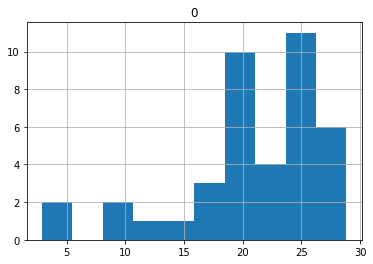

In [14]:
np_sel_test = np.array([get_data(z, member_generation=False)['full_acc'] for z in (data.keys())]).sum(axis=1)
np_sel_test
df = pd.DataFrame(data=np_sel_test)
print(df)
df.hist()

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

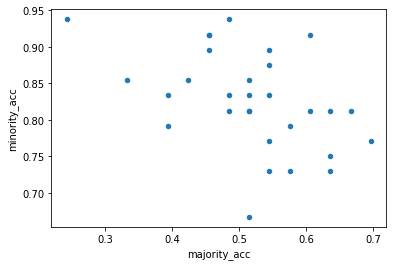

In [15]:
get_data(20, member_generation=True).plot.scatter(x='majority_acc', y='minority_acc') 

In [18]:
# Get the description for each. 
data2= []
for key in data.keys():
    try:
        data2.append(get_data(key, member_generation=False)['full_acc'].describe())
    except:
        pass

description = pd.DataFrame(data=data2)
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in model_names:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

,count,mean,std,min,25%,50%,75%,max
cleveland_gp,30.0,0.879245,0.033276,0.811321,0.867925,0.882075,0.903302,0.933962
ionosphere_gp,30.0,0.826372,0.020058,0.779116,0.811245,0.829317,0.842369,0.863454
ecoli_gp,30.0,0.537778,0.155982,0.333333,0.333333,0.666667,0.666667,0.666667
iris_gp,30.0,0.146535,0.144591,0.009901,0.022277,0.099010,0.254950,0.425743
mammo_graphic_gp,30.0,0.700823,0.041983,0.604938,0.679012,0.703704,0.728395,0.790123
wisconsin_breast_cancer_gp,30.0,0.711111,0.034250,0.629630,0.703704,0.703704,0.740741,0.777778
australia_gp,30.0,0.721095,0.072591,0.574879,0.683575,0.724638,0.758454,0.859903
postop_gp,30.0,0.377354,0.054453,0.311659,0.328475,0.367713,0.417040,0.482063
yeast_gp,30.0,0.793333,0.042845,0.722222,0.766667,0.788889,0.830556,0.866667
spec_gp,30.0,0.855072,0.018602,0.806763,0.841787,0.850242,0.868357,0.888889


<AxesSubplot:xlabel='mean', ylabel='std'>

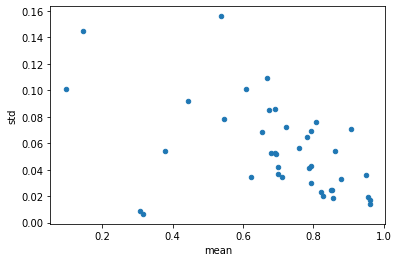

In [19]:
description.plot.scatter('mean', 'std')

<AxesSubplot:ylabel='Frequency'>

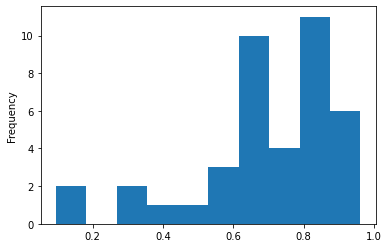

In [20]:
description['mean'].plot.hist()

# Graphing a task

# Analysis of the description

This table shows the performance of the bag model on each dataset. Important aspects:
- yeast and spec both have the same accuracy within the quantiles, this suggests the model isn't correct. Potentially it only outputs 0 or 1. 
- The performance is not particularly impressive, maybe tuning the hyper parameters could be useful




In [21]:
# data, get_data(member_generation, training. )

# Graphs on training 

# Box plot

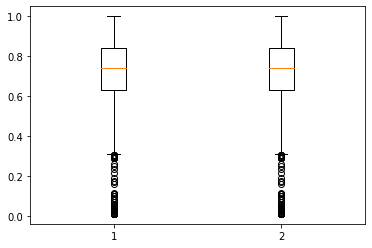

In [38]:
Xtest = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in (data.keys())])
Xtest = X.flatten()

Xtrain = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in (data.keys())])
Xtrain = X.flatten()

fig, ax = plt.subplots()
ax.boxplot([Xtrain, Xtest])
plt.show()


## History of training performance per dataset on a box plot

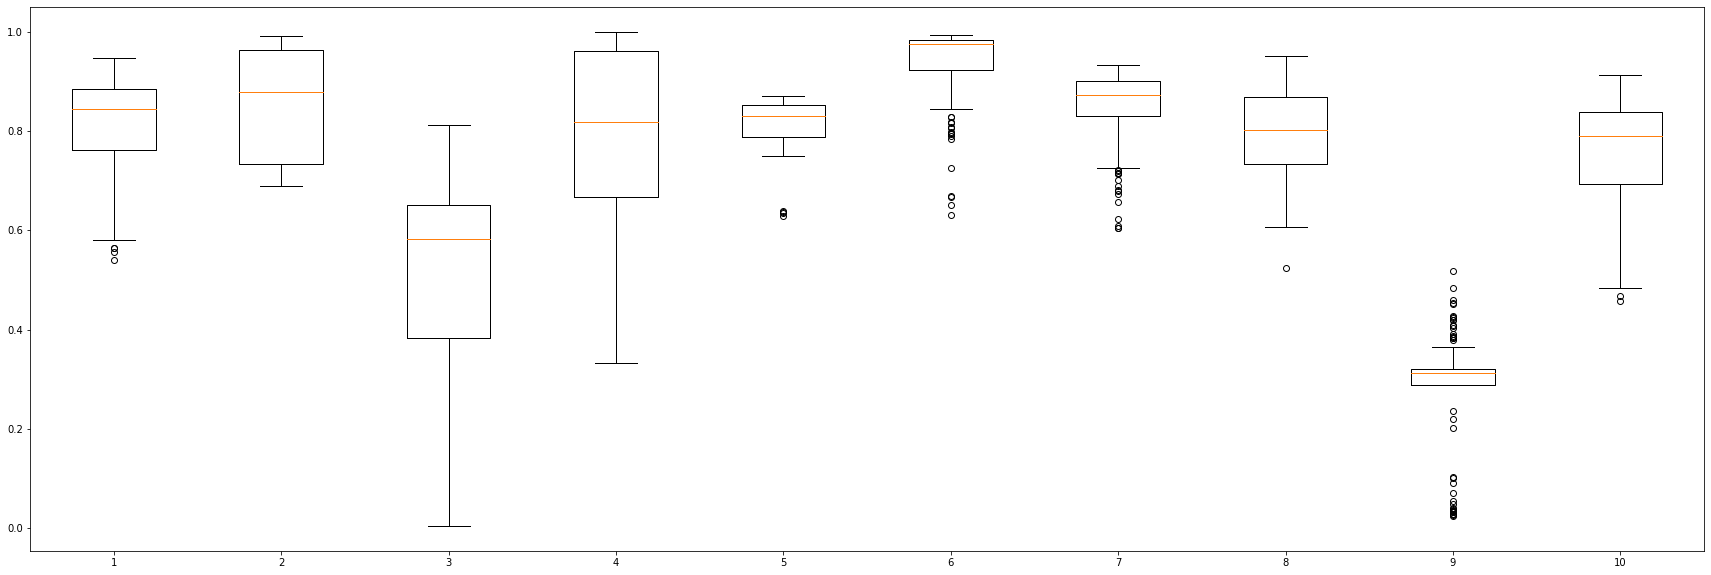

In [41]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in data.keys() if z in dataset_keys])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp','')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')


fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Histogram of test performance per dataset

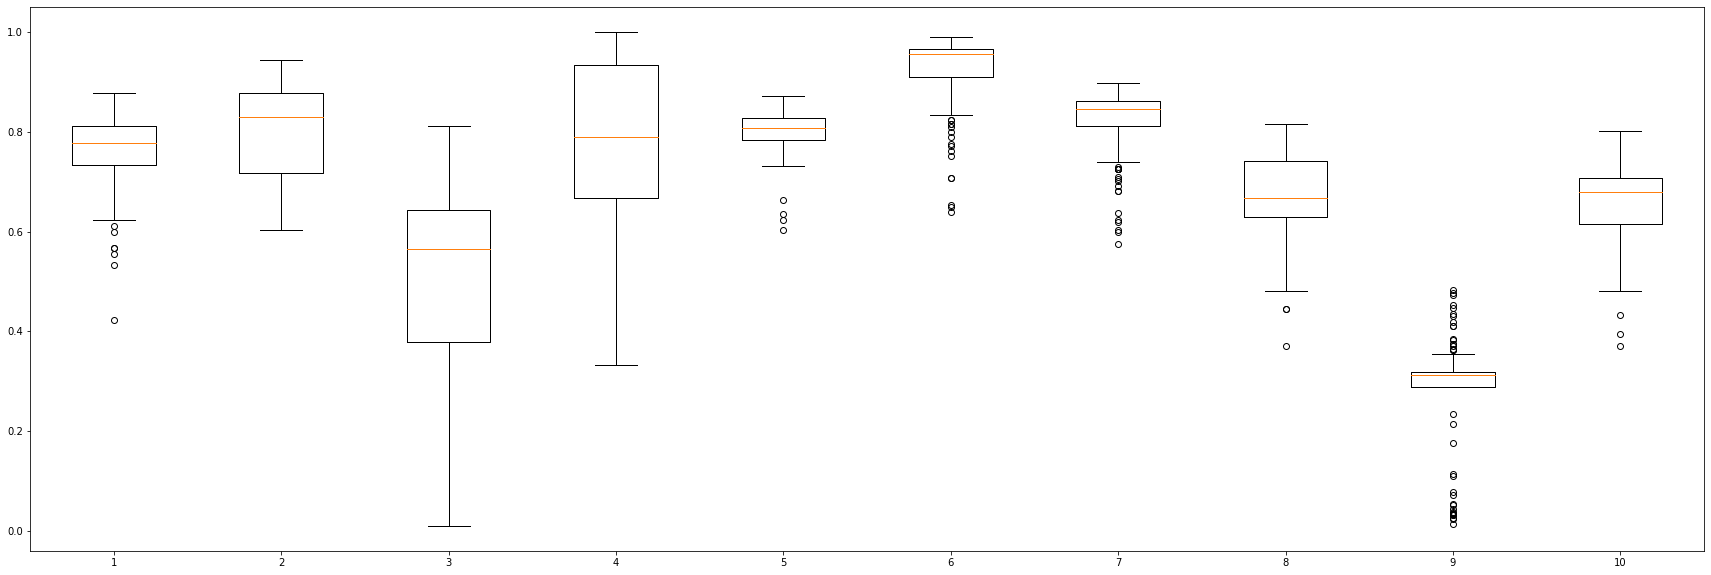

In [42]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp','')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')

fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Histogram of train performance per model, arranged on a 1x4 grid 

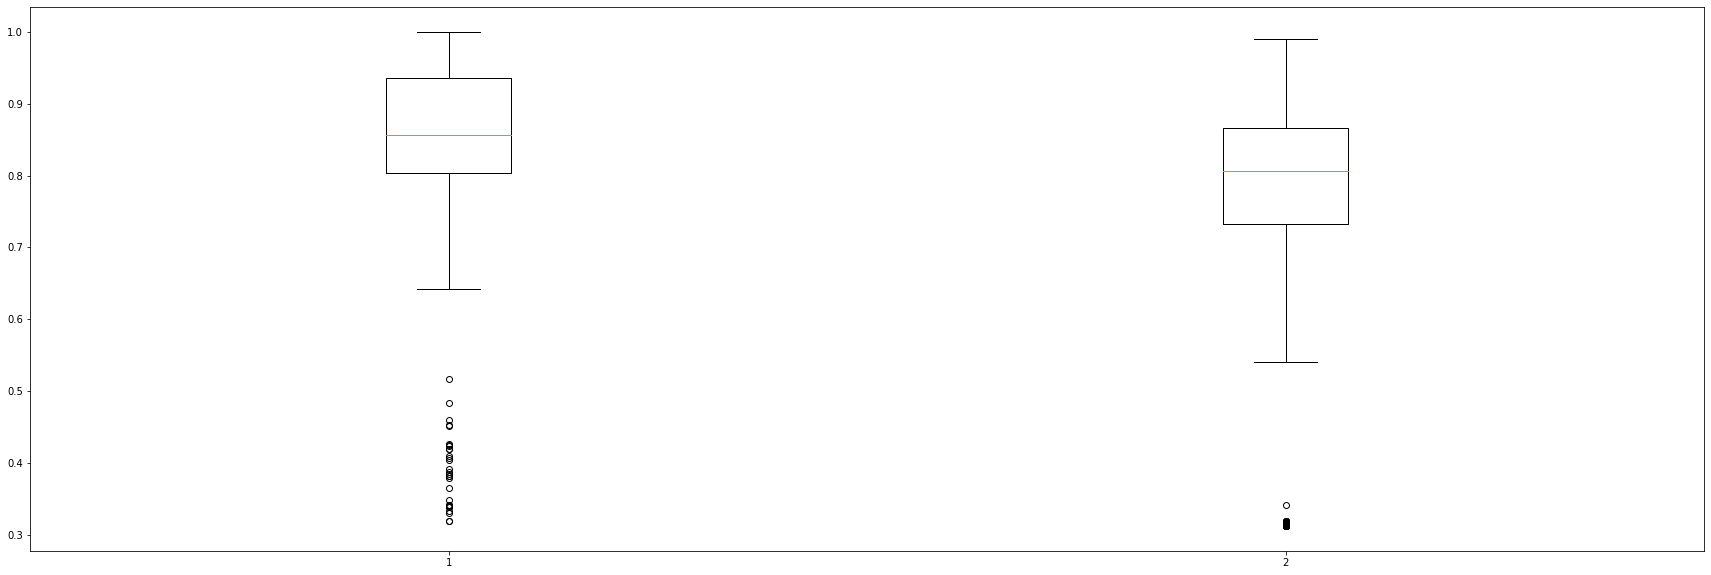

In [43]:
plots = []
for row_i in range(len(axis)):
    row_i = row_i + 1
    X = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in data.keys() if z in keys_by_model(row_i-1)])
    X = X.flatten()
    plots.append(X)
    #dfX = pd.DataFrame(data=X, columns=[model_names[row_i-1]])
    #dfX.plot.hist(ax=axis[row_i-1],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Histogram of test performance per model, arranged on a 1x4 grid 

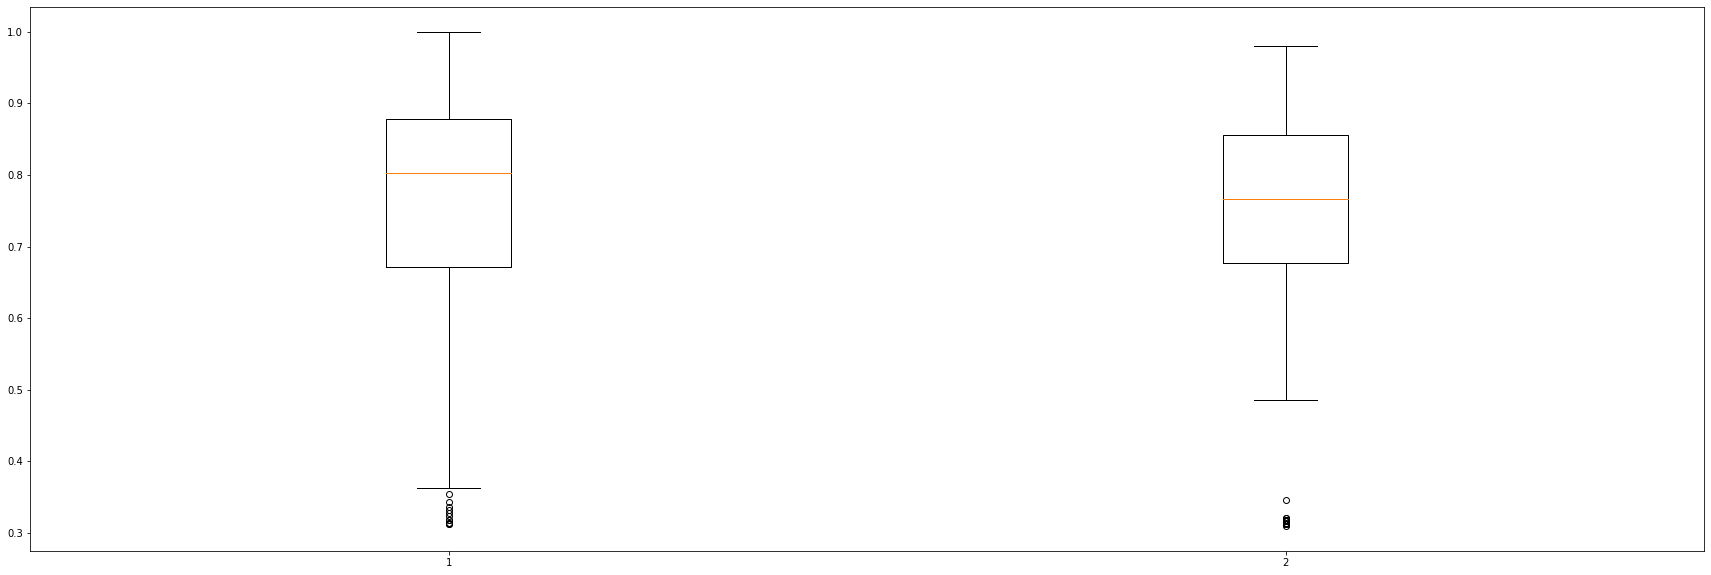

In [44]:
plots = []
for row_i in range(len(axis)):
    row_i = row_i + 1
    X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in keys_by_model(row_i-1)])
    X = X.flatten()
    plots.append(X)
    #dfX = pd.DataFrame(data=X, columns=[model_names[row_i-1]])
    #dfX.plot.hist(ax=axis[row_i-1],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Training performance of GP per over each datset 

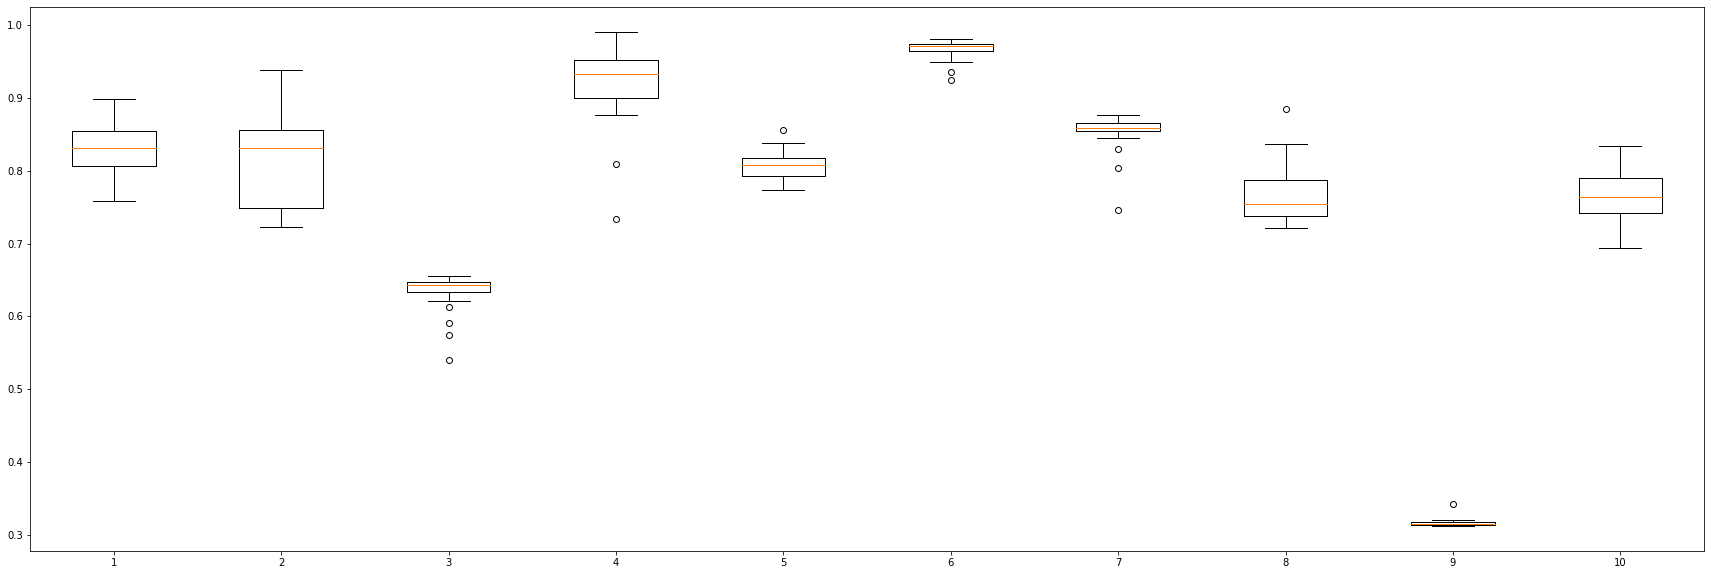

In [45]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(1)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Test performance of GP per over each datset 

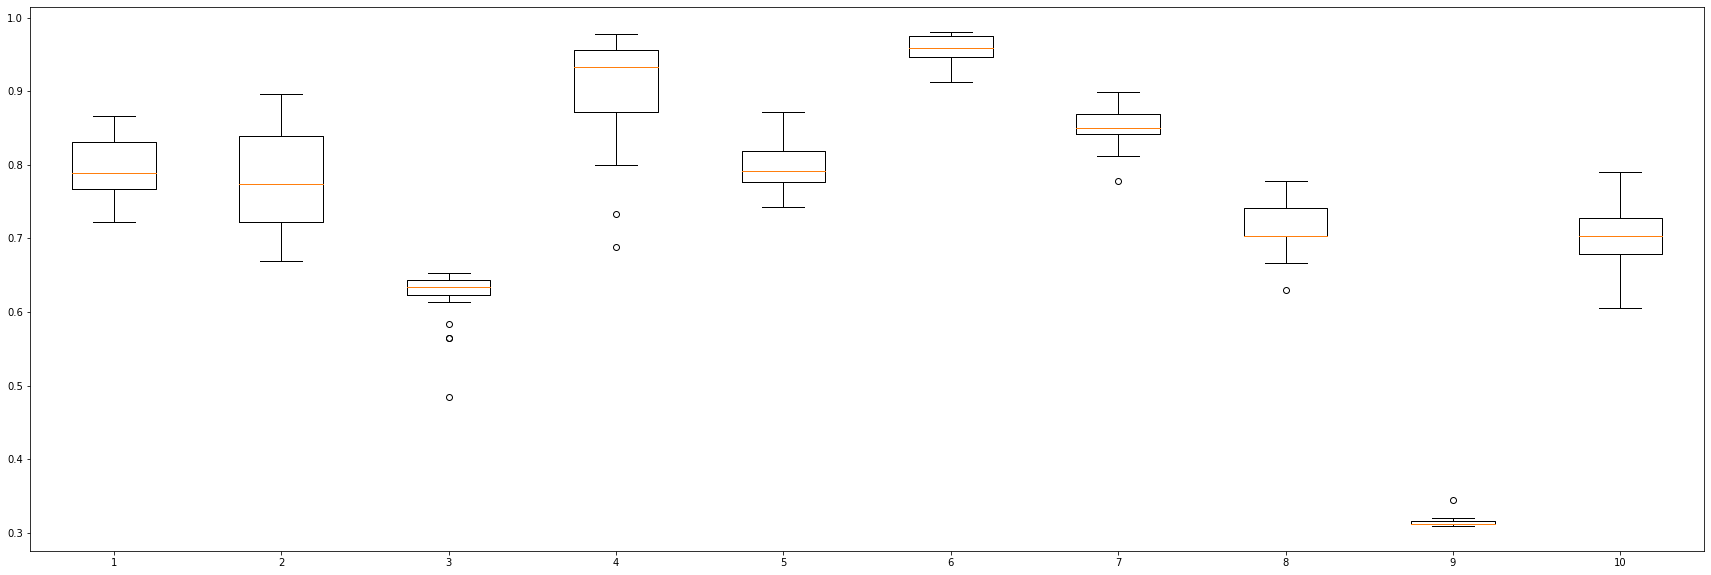

In [46]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(1)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Training performance of Bag per over each datset 

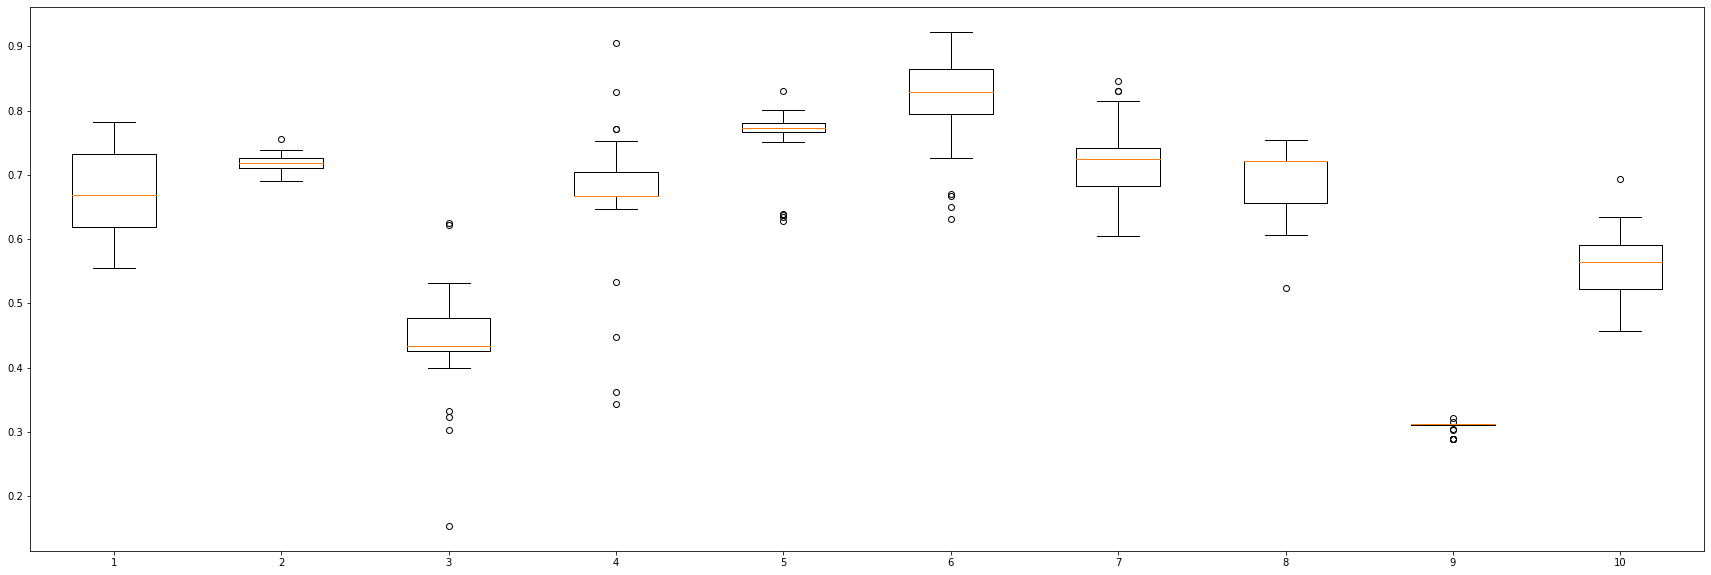

In [47]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(2)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Test performance of Bag per over each datset 

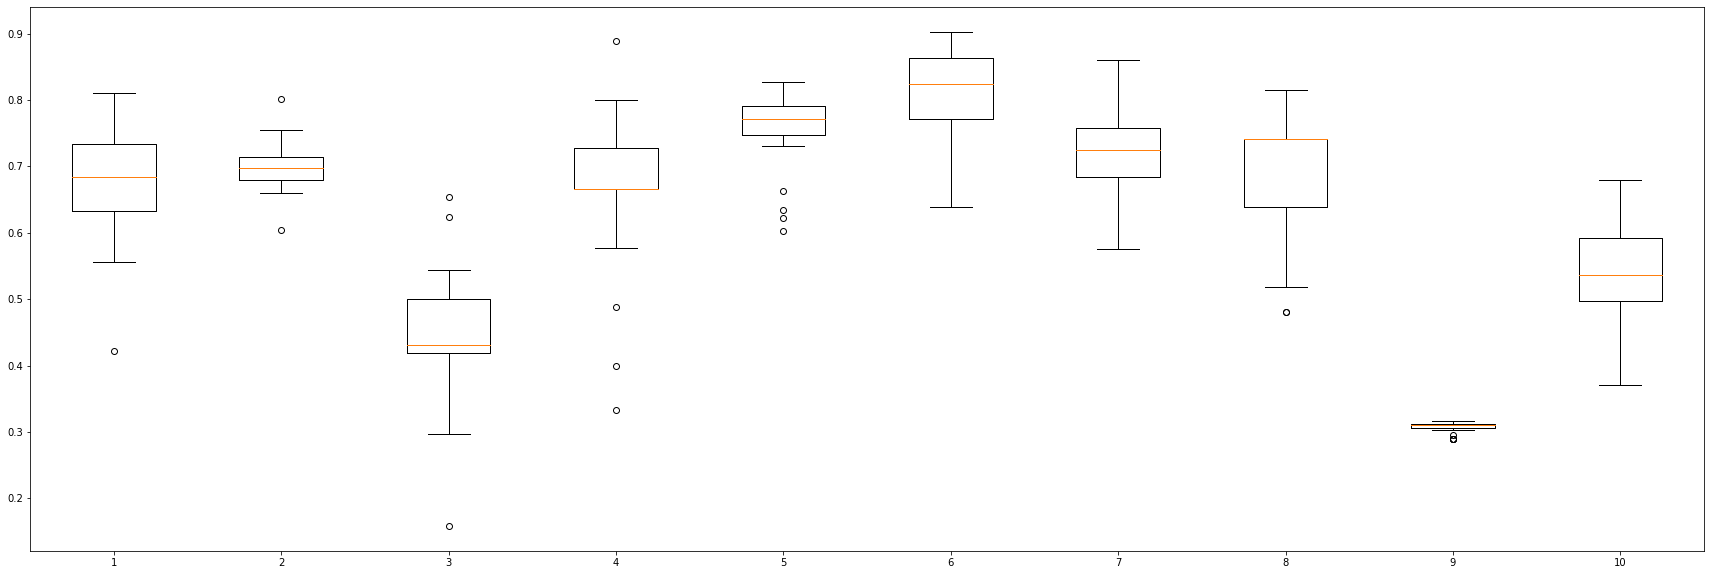

In [48]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(2)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Training performance of Niche per over each datset 

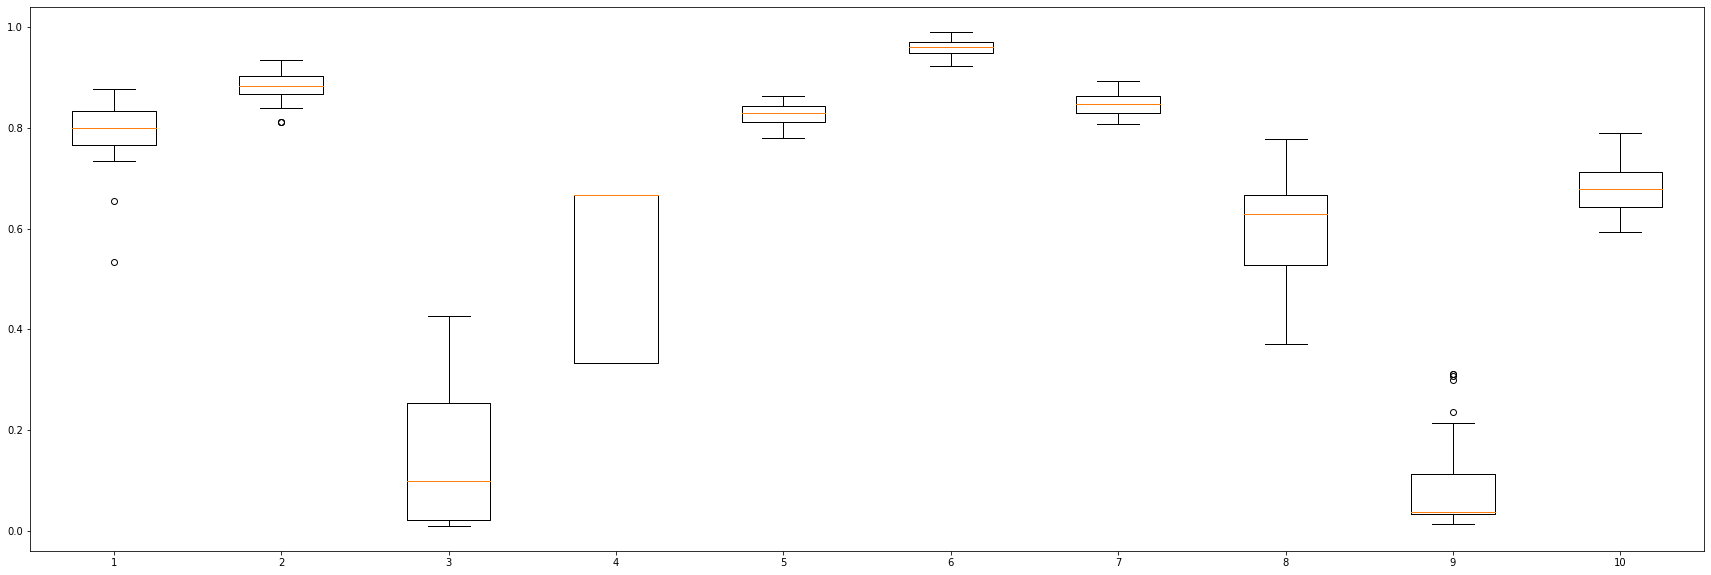

In [49]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(3)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Test performance of Niche per over each datset 

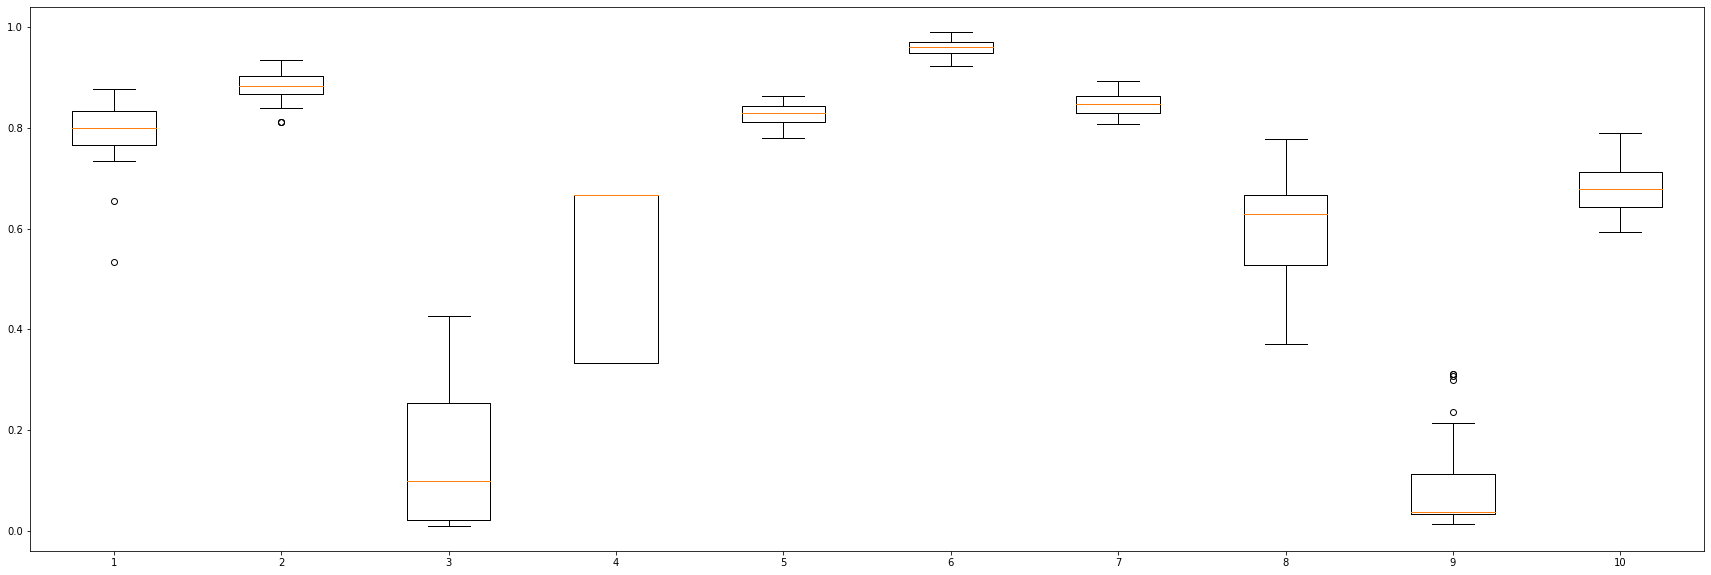

In [50]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(3)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Training performance of CCGP per over each datset 

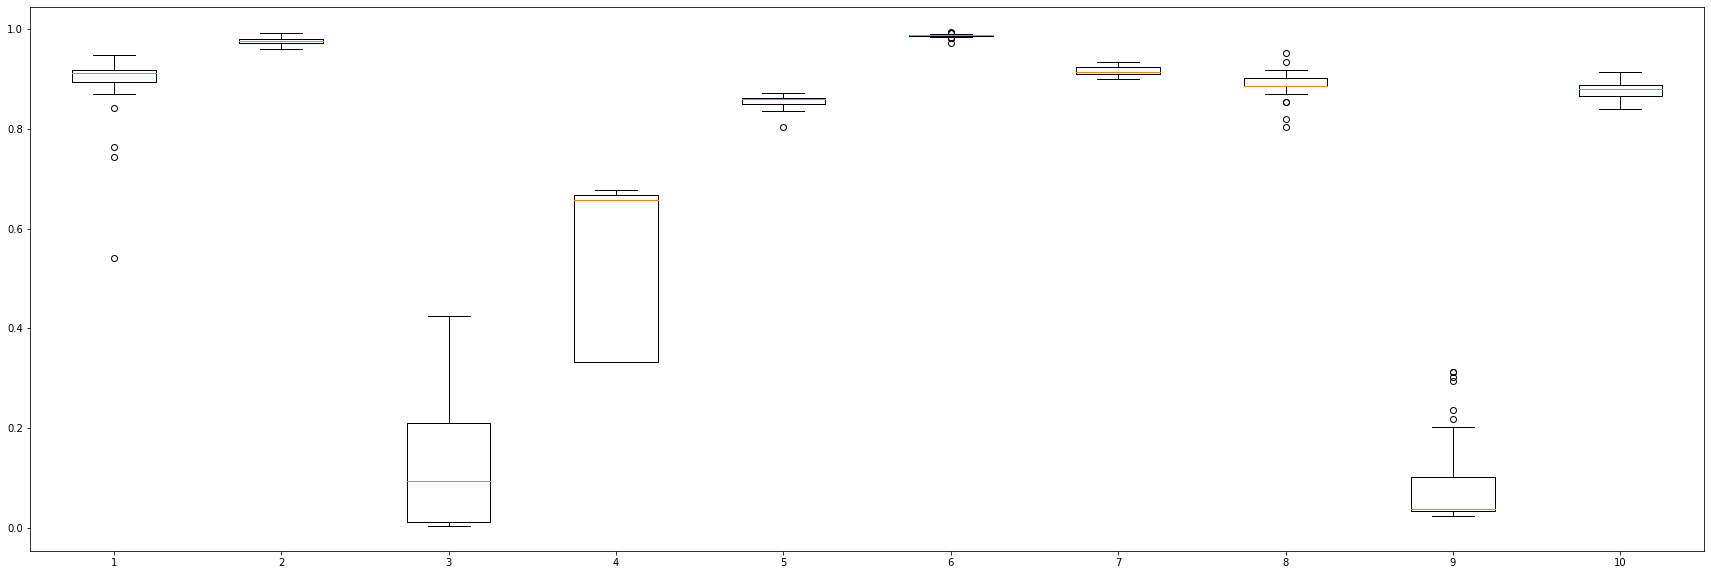

In [51]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=True)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(3)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

## Test performance of CCGP per over each datset 

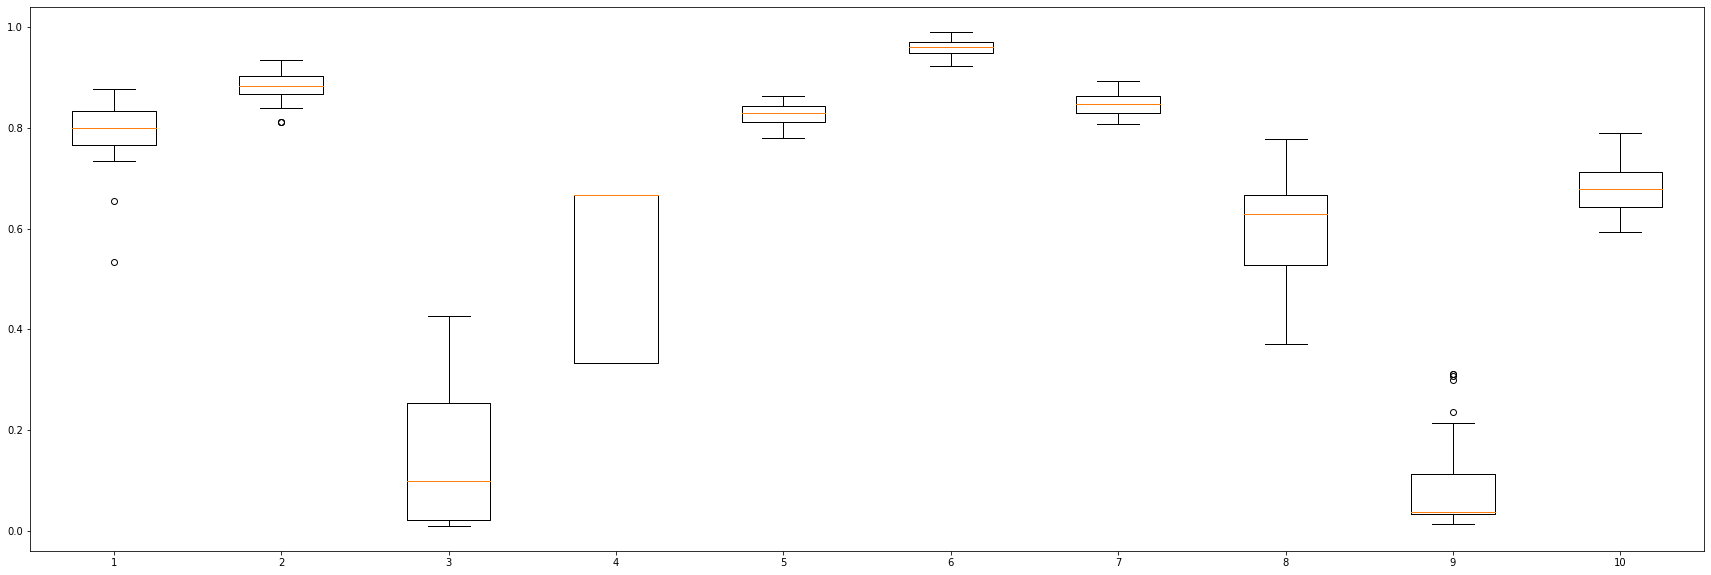

In [52]:
plots = []
for row_i in range(len(axis)):
    for col_i in range(len(axis[row_i])):
        ind = (row_i * 5) + col_i + 1 # 1->10 
        dataset_keys = [ind, ind+10, ind+20, ind+30] # keys for each dataset on each model
        X = np.array([get_data(z, member_generation=False, training=False)['full_acc'] for z in data.keys() if z in dataset_keys and z in keys_by_model(3)])
        X = X.flatten()
        plots.append(X)
        #dfX = pd.DataFrame(data=X, columns=[names[ind].replace('gp',model_names[row_i-1]+'_')])
        #dfX.plot.hist(ax=axis[row_i,col_i],sharex=False, sharey=False, xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], color='green')
fig, ax = plt.subplots(figsize=(30, 10))
ax.boxplot(plots)
plt.show()

# Trying out box plots